##### 인구증가율과 고령인구비율간의 회귀분석

In [11]:
# X : 인구증가율(%),  y : 노령인구비율(%)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

X = np.array(X)
y = np.array(y)

len(X), len(y)

(16, 16)

In [2]:
# 프로그래밍의 흐름을 미리 살펴보자.
# a와 b를 (0, 1]구간(0 < a, b <= 1 : ():열린구간, []:닫힌구간)의 랜덤한 값으로 초기화한다. 
# 잔차 제곱의 평균을 loss로 하고 반환하는 함수를 정의한다.
# 이렇게 정의된 compute_loss값을 최소화하는 것이고 이런 과정이 딥러닝을 포함해 머신러닝의 주요 알고리즘이다.
# 최적화함수(optimizer)는 이 과정(복잡한 미분 계산 및 가중치 업데이트)을 자동으로 진행해주는 편리한 도구이다.
# Tensorflow 2.0에서는 여러 곳에 분산돼 있던 optimizer를 tf.optimizers안에 모았고 여기서 Adam optimizer를 부른다.
# SGD와 함께 Adam도 가장 많이 사용되는 최적화함수 중 하나이다. 
# 적당한 학습률을 넣으면 Adam은 안정적이고 효율적으로 학습한다. 여기선 0.07을 사용했다. 보통[0.0001, 0.1]
# 1000번의 학습을 거쳐 a와 b는 compute_loss값을 최소화하는 적절한 값에 도달한다.

In [12]:
# a와 b를 랜덤한 값으로 초기화한다.
a = tf.Variable(random.random())    # random() -> x in the interval (0,1]
b = tf.Variable(random.random())

# 잔차 제곱의 평균을 반환하는 함수
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((y - y_pred) ** 2)
    return loss

optimizer = tf.optimizers.Adam(learning_rate=0.07)

for i in range(1000):
    # 잔차 제곱이 평균을 최소화(minimize)한다.
    optimizer.minimize(compute_loss, var_list=[a, b])
    
    if i % 100 == 99:
        print(f"{i:3d}  a :  {a.numpy():8.4f}     b : {b.numpy():8.4f}     loss : {compute_loss().numpy():10.6f}")

 99  a :    0.1110     b :   6.8775     loss :  86.897240
199  a :   -0.1251     b :  11.3322     loss :  28.547447
299  a :   -0.2615     b :  13.8950     loss :  12.921564
399  a :   -0.3243     b :  15.0759     loss :  10.132126
499  a :   -0.3472     b :  15.5079     loss :   9.806812
599  a :   -0.3539     b :  15.6337     loss :   9.782066
699  a :   -0.3555     b :  15.6630     loss :   9.780843
799  a :   -0.3558     b :  15.6684     loss :   9.780804
899  a :   -0.3558     b :  15.6692     loss :   9.780804
999  a :   -0.3558     b :  15.6693     loss :   9.780804


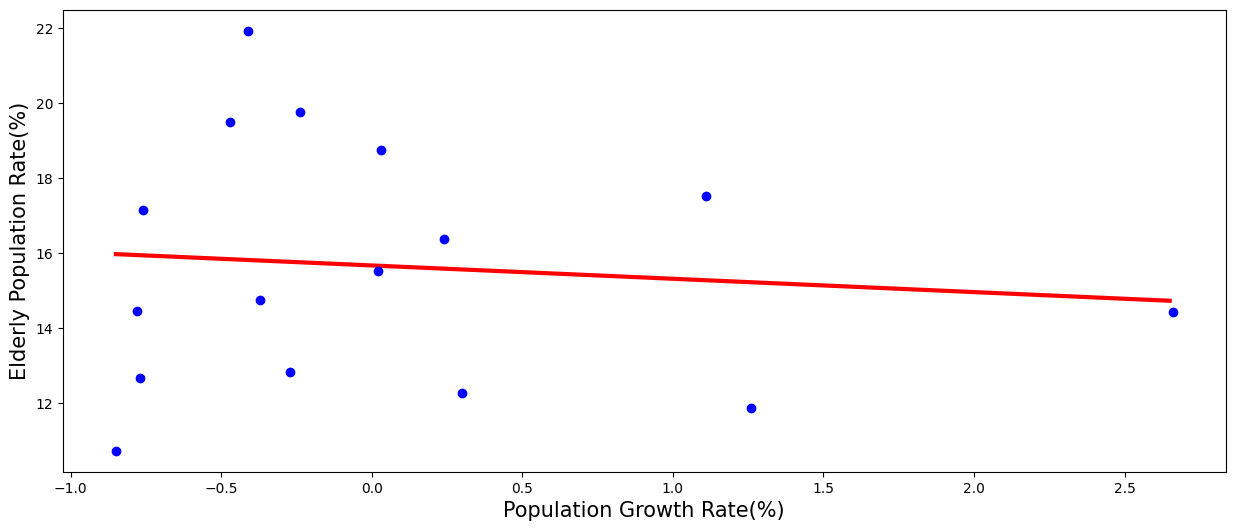

In [13]:
plt.rcParams['figure.figsize'] = (15, 6)
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그린다.
plt.plot(line_x, line_y, 'r-', linewidth=3)
plt.plot(X, y, 'bo')
plt.xlabel('Population Growth Rate(%)', size=15)
plt.ylabel('Elderly Population Rate(%)', size=15)
plt.show()

##### 이렇게 얻은 회귀선이 데이터를 잘 반영하고 있지 않아서 다항회귀를 시도해보자.

In [14]:
# a, b, c를 랜덤한 값으로 초기화한다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차 제곱의 평균을 반환하는 함수를 정의한다.
def compute_loss():
    y_pred = a * X ** 2 + b * X + c
    loss = tf.reduce_mean((y - y_pred) ** 2)
    return loss

optimizer = tf.optimizers.Adam(learning_rate=0.07)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list = [a,b,c])
    if i % 100 == 99:
        print(f"{i:3d}  a :  {a.numpy():8.4f}     b : {b.numpy():8.4f}     c : {c.numpy():8.4f}    loss : {compute_loss().numpy():10.6f}")

 99  a :    3.9917     b :  -5.7948     c :   6.4056    loss :  69.300819
199  a :    2.8699     b :  -4.6347     c :  10.1904    loss :  32.349247
299  a :    1.3440     b :  -2.3688     c :  12.8268    loss :  16.485523
399  a :    0.3679     b :  -0.9134     c :  14.4980    loss :  11.137910
499  a :   -0.1621     b :  -0.1235     c :  15.4076    loss :   9.769594
599  a :   -0.4114     b :   0.2479     c :  15.8357    loss :   9.501550
699  a :   -0.5133     b :   0.3998     c :  16.0106    loss :   9.461211
799  a :   -0.5495     b :   0.4538     c :  16.0729    loss :   9.456551
899  a :   -0.5608     b :   0.4705     c :  16.0922    loss :   9.456141
999  a :   -0.5638     b :   0.4750     c :  16.0973    loss :   9.456112


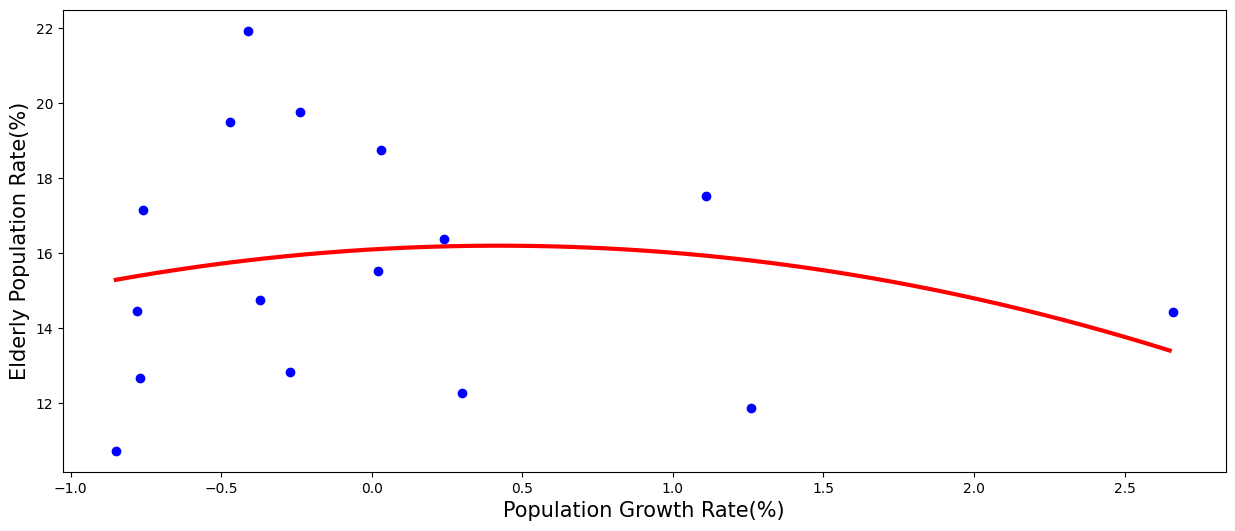

In [16]:
plt.rcParams['figure.figsize'] = (15, 6)
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그린다.
plt.plot(line_x, line_y, 'r-', linewidth=3)
plt.plot(X, y, 'bo')
plt.xlabel('Population Growth Rate(%)', size=15)
plt.ylabel('Elderly Population Rate(%)', size=15)
plt.show()